In [2]:
import pandas as pd

In [4]:
data = pd.read_excel('Results.xlsx')

## HCl/DCl

36    -47.039315
37     -94.07863
38   -156.797717
39   -235.196575
40   -329.275206
41   -439.033607
42   -564.471781
43   -705.589726
44   -862.387443
Name: ~ -J'' * (J''+1) * hcBe/kB), dtype: object


C:\Users\yakir\AppData\Local\Temp\ipykernel_12552\140236549.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


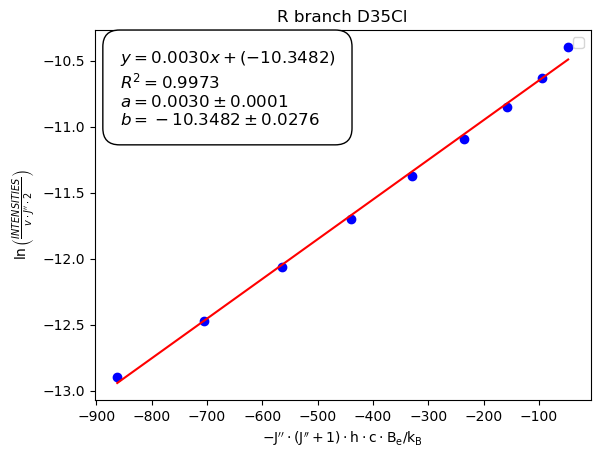

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# File path and loading data
file_path = 'חישובי פרמטרים.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path, sheet_name=6)

# Splitting data into features (X) and target variable (y)
x_data = data.iloc[36:46, 7]  
y_data = data.iloc[36:46, 6]   
print(x_data)
# Defining the linear model
def model(x, a, b):
    return a * x + b  # Linear function: y = a*x + b

# Fit the curve to the data using curve_fit
params, covariance = curve_fit(model, x_data, y_data)

# Extract the optimized parameters (a and b)
a, b = params

# Calculate the standard deviations (deviations) for a and b
a_error, b_error = np.sqrt(np.diag(covariance))

# Generate fitted values using the model
y_fit = model(x_data, a, b)

# Calculate residuals
residuals = y_data - y_fit

# Calculate the sum of squares of residuals (SS_res)
ss_res = np.sum(residuals**2)

# Calculate the total sum of squares (SS_tot)
ss_tot = np.sum((y_data - np.mean(y_data))**2)

# Calculate R^2
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, color='blue')
plt.plot(x_data, y_fit, color='red')

# Add labels and title
plt.xlabel(r'$\mathrm{-J^{\prime\prime} \cdot (J^{\prime\prime} + 1) \cdot h \cdot c \cdot B_e / k_B}$')
plt.ylabel(r'$\ln\left(\frac{INTENSITIES}{v \cdot J^{\prime\prime} \cdot 2}\right)$')
plt.title('R branch D35Cl')

# Add fitted equation, R^2, and deviations in the same box
text = (f'$y = {a:.4f}x + ({b:.4f})$\n'
        f'$R^2 = {r_squared:.4f}$\n'
        f'$a = {a:.4f} \pm {a_error:.4f}$\n'
        f'$b = {b:.4f} \pm {b_error:.4f}$')

# Display the fitted curve, R^2, and deviations in the same box
plt.text(0.05, 0.95, text, 
         transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Display the plot
plt.legend()
plt.show()




## Temp calculations

0     -30.476135
1     -91.428406
2    -182.856813
3    -304.761354
4    -457.142032
5    -639.998844
6    -853.331792
7   -1097.140876
Name: ~ -J'' * (J''+1) * hcBe/kB), dtype: object
Fitted parameters: a = 0.002868515489380554, b = -8.1291385423879


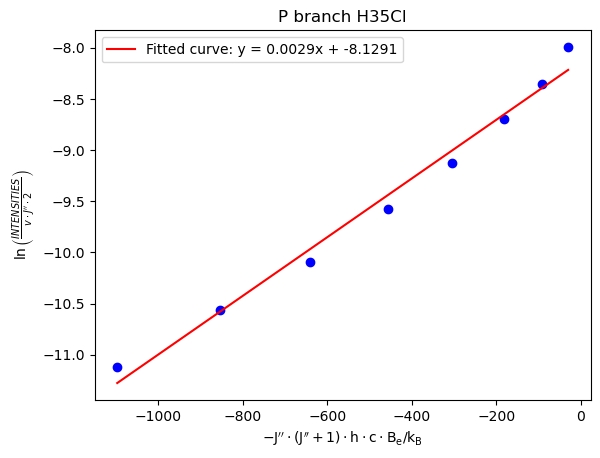

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


file_path = 'חישובי פרמטרים.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path, sheet_name=6)

# Step 3: Splitting data into features (X) and target variable (y)
x_data = data.iloc[0:8, 7]  
y_data = data.iloc[0:8, 6]   
print(x_data)
def model(x, a, b):
    return a * x + b  # Linear function: y = a*x + b

# Fit the curve to the data using curve_fit
params, covariance = curve_fit(model, x_data, y_data)

# Extract the optimized parameters (a and b)
a, b = params
print(f"Fitted parameters: a = {a}, b = {b}")

# Generate fitted values using the model
y_data_fitted = model(x_data, a, b)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, color='blue')
plt.plot(x_data, y_data_fitted, color='red', label=f'Fitted curve: y = {a:.4f}x + {b:.4f}')
plt.xlabel(r'$\mathrm{-J^{\prime\prime} \cdot (J^{\prime\prime} + 1) \cdot h \cdot c \cdot B_e / k_B}$')
plt.ylabel(r'$\ln\left(\frac{INTENSITIES}{v \cdot J^{\prime\prime} \cdot 2}\right)$')
plt.title('P branch H35Cl')
plt.legend()
plt.show()


## CO2

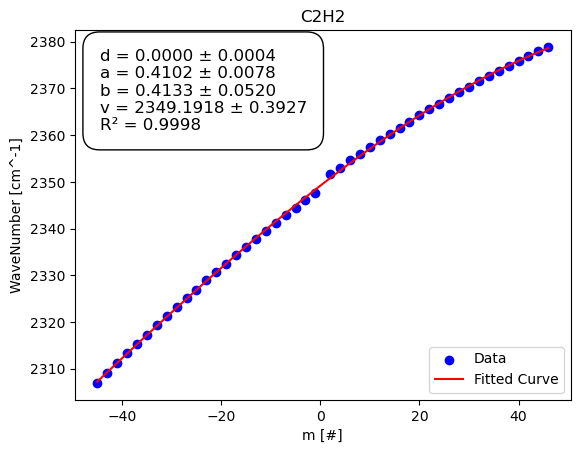

In [5]:
## this code is for the fitting of the data of CO2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from Excel
file_path = 'CO2_peaks.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path)


# Extract x (column 1) and y (column 2) from the even-numbered rows
x_data = data.iloc[1:47, 7]  # Column 4 (zero-indexed)
y_data = data.iloc[1:47, 8]  # Column 5 (zero-indexed)

# Define the custom function to fit: -4dx^3 - ax^2 + (2b-2a)x + v
def custom_function(x, d, a, b, v):
    fitting = -4 * d * x**3 + (a-b) * x**2 + (a + b) * x + v
    return fitting

# Fit the data using curve_fit
params, covariance = curve_fit(custom_function, x_data, y_data)

# Extract the fitted parameters
d_fit, a_fit, b_fit, v_fit = params

# Calculate the fitted values
y_fit = custom_function(x_data, *params)

# Calculate R-squared (R^2)
residuals = y_data - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')

# Annotate the plot with the fitted parameters and R-squared
plt.text(0.05, 0.95, f'd = {d_fit:.4f} ± {d_error:.4f}\n'
                     f'a = {a_fit:.4f} ± {a_error:.4f}\n'
                     f'b = {b_fit:.4f} ± {b_error:.4f}\n'
                     f'v = {v_fit:.4f} ± {v_error:.4f}\n'
                     f'R² = {r_squared:.4f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.legend()
plt.xlabel('m [#]')
plt.ylabel('WaveNumber [cm^-1]')
plt.title('C2H2')
plt.show()

param_errors = np.sqrt(np.diag(covariance))
d_error, a_error, b_error, v_error = param_errors



## C2H2

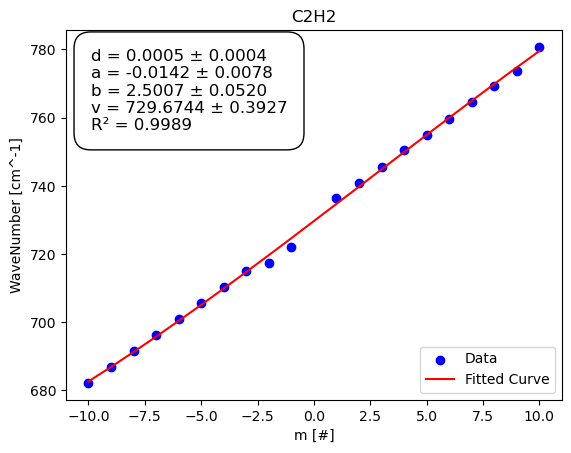

In [4]:
## this code is for the fitting of the data of C2H2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from Excel
file_path = 'C2H2.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path)

# Extract x (column 6) and y (column 7)
x_data = data.iloc[1:21, 18]  # Column 6 (zero-indexed)
y_data = data.iloc[1:21, 19]  # Column 7 (zero-indexed)

# Define the custom function to fit: -4dx^3 - ax^2 + (2b-2a)x + v
def custom_function(x, d, a, b, v):
    fitting = -4 * d * x**3 - a * x**2 + (2 * b - 2 * a) * x + v
    return fitting

# Fit the data using curve_fit
params, covariance = curve_fit(custom_function, x_data, y_data)

# Extract the fitted parameters
d_fit, a_fit, b_fit, v_fit = params

# Calculate the fitted values
y_fit = custom_function(x_data, *params)

# Calculate R-squared (R^2)
residuals = y_data - y_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)


# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')


# Add labels and legend
plt.text(0.05, 0.95, f'd = {d_fit:.4f} ± {d_error:.4f}\n'
                     f'a = {a_fit:.4f} ± {a_error:.4f}\n'
                     f'b = {b_fit:.4f} ± {b_error:.4f}\n'
                     f'v = {v_fit:.4f} ± {v_error:.4f}\n'
                     f'R² = {r_squared:.4f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.legend()
plt.xlabel('m [#]')
plt.ylabel('WaveNumber [cm^-1]')
plt.title('C2H2')
plt.show()

param_errors = np.sqrt(np.diag(covariance))
d_error, a_error, b_error, v_error = param_errors



## fitting R branch intensitys to J